In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
import numpy as np
import datetime
import json
from pandas.io.json import json_normalize
from sklearn import metrics

# Load Data

In [91]:
df=pd.read_csv(r'C:\Users\maz\Desktop\uptake_data\train.csv')

C:\Users\maz\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [72]:
df.shape

(182190, 481)

481 Columns and 182190 rows in the training dataset

# Amount Received

In [3]:
#missing values replaced with zero donation
df.amount=df.amount.fillna(0)
print('percentage of people donated',df.query('amount>0').shape[0]*100/df.shape[0])

percentage of people donated 5.076568417586037


missing value percentage 0.0


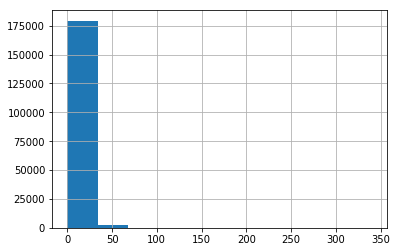

In [250]:
df.amount.hist()
print('missing value percentage',df.amount.isnull().sum()*100/df.shape[0])


# Marketing Cost Analysis 

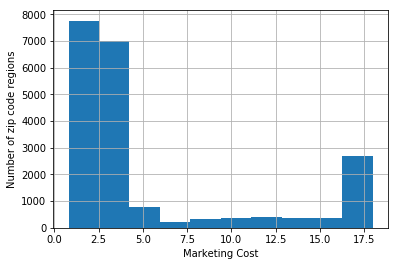

In [4]:
zipcost=pd.read_csv(r'C:\Users\maz\Desktop\uptake_data\zipCodeMarketingCosts.csv')
plt.hist(zipcost.marketingCost)
plt.xlabel('Marketing Cost')
plt.ylabel('Number of zip code regions')
plt.grid(True)
           

In [237]:
print('Average Marketing cost is ',np.mean(zipcost.marketingCost))

Average Marketing cost is  5.4739013076734215


# Missing Values And Data Preprocessing

In [5]:
c=0
for i in df.columns:
    if df[i].isnull().sum()>0:
        c+=1
        print('%s Missing Data Percentage in'%i,df[i].isnull().sum()*100/df.shape[0])
print('Total Number of Columns with missing data is ', c)

age Missing Data Percentage in 24.7538284208793
numchld Missing Data Percentage in 87.02343707118942
income_range Missing Data Percentage in 22.29375926230858
wealth1 Missing Data Percentage in 46.85657829738185
mbcraft Missing Data Percentage in 55.37460892474889
mbgarden Missing Data Percentage in 55.37460892474889
mbbooks Missing Data Percentage in 55.37460892474889
mbcolect Missing Data Percentage in 55.435534332290466
magfaml Missing Data Percentage in 55.37460892474889
magfem Missing Data Percentage in 55.37460892474889
magmale Missing Data Percentage in 55.37460892474889
pubgardn Missing Data Percentage in 55.37460892474889
pubculin Missing Data Percentage in 55.37460892474889
pubhlth Missing Data Percentage in 55.37460892474889
pubdoity Missing Data Percentage in 55.37460892474889
pubnewfn Missing Data Percentage in 55.37460892474889
pubphoto Missing Data Percentage in 55.37460892474889
pubopp Missing Data Percentage in 55.37460892474889
wealth2 Missing Data Percentage in 45.92

Date Channels of the previous campaigns most of them are missing and not in valid fromat. Hence date columns are removed

In [6]:
date_columns=[]
for i in df.columns:
    if 'date' in i:
        date_columns.append(i)
df=df.drop(date_columns,axis=1)
df.shape

(182190, 429)

429 Variables Remaining after troping date columns

# RAmount Columns
missing values imputed with zeros

In [7]:
for i in df.columns:
    if 'ramnt' in i:
        df[i]=df[i].fillna(0)

In [8]:
missing_vals=df.isnull().sum()*100/df.shape[0]
missing_vals[missing_vals>0]
             

age             24.753828
numchld         87.023437
income_range    22.293759
wealth1         46.856578
mbcraft         55.374609
mbgarden        55.374609
mbbooks         55.374609
mbcolect        55.435534
magfaml         55.374609
magfem          55.374609
magmale         55.374609
pubgardn        55.374609
pubculin        55.374609
pubhlth         55.374609
pubdoity        55.374609
pubnewfn        55.374609
pubphoto        55.374609
pubopp          55.374609
wealth2         45.927329
msa              0.137219
adi              0.137219
dma              0.137219
timelag         10.427576
cluster2         0.137219
geocode2         0.137219
dtype: float64

# Age column missing values imputed with median age

In [9]:
df['age']=df.age.fillna(np.nanmedian(df.age))

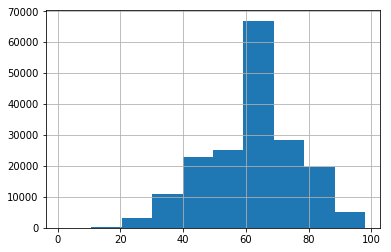

In [10]:
df.age.hist()

# number of children  column missing values imputed with zero

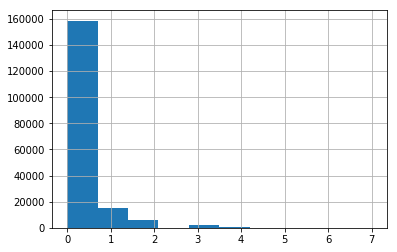

In [11]:
df['numchld']=df.numchld.fillna(0)
df.numchld.hist()

# Income column missing values imputed with median income

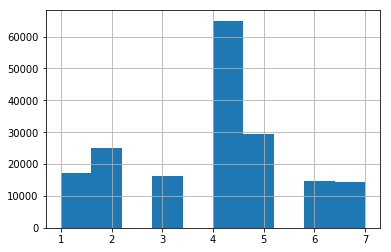

In [12]:
df.income_range=df.income_range.fillna(np.nanmedian(df.income_range))
df.income_range.hist()

# Wealth Rating

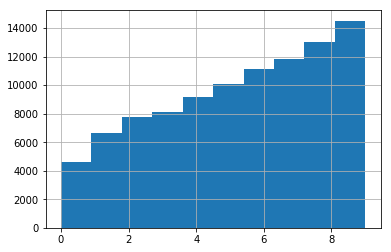

In [13]:
df.wealth1.hist()
df.wealth1=df.wealth1.fillna(np.nanmean(df.wealth1))


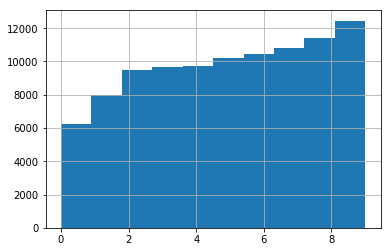

In [14]:
df.wealth2.hist()
df.wealth2=df.wealth1.fillna(np.mean(df.wealth2))
df.wealth1=df.wealth1.fillna(np.nanmean(df.wealth1))

# Buy Craft Hobby
missing values inserted with zero

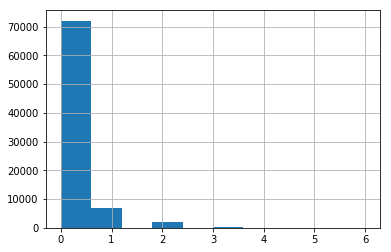

In [15]:
df.mbcraft.hist()
df.mbcraft=df.mbcraft.fillna(0)

# Other  Similar hobbies are imputed with zero for NA values                        


In [16]:
missing_vals[missing_vals>0].index

Index(['age', 'numchld', 'income_range', 'wealth1', 'mbcraft', 'mbgarden',
       'mbbooks', 'mbcolect', 'magfaml', 'magfem', 'magmale', 'pubgardn',
       'pubculin', 'pubhlth', 'pubdoity', 'pubnewfn', 'pubphoto', 'pubopp',
       'wealth2', 'msa', 'adi', 'dma', 'timelag', 'cluster2', 'geocode2'],
      dtype='object')

In [17]:
for i in ['mbgarden',  'mbbooks', 'mbcolect', 'magfaml', 'magfem', 'magmale', 'pubgardn',
       'pubculin', 'pubhlth', 'pubdoity', 'pubnewfn', 'pubphoto', 'pubopp']:
    df[i]=df[i].fillna(0)

# Amount Columns Analysis 

94% percentage of data missing hence column dropped

In [18]:
df=df.drop(['amount'],axis=1)

# Time Lag :Number of months between first and second gift


missing value percentage 10.42757560788188


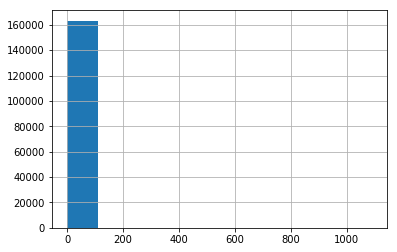

In [19]:
df.timelag.hist()
print('missing value percentage',df.timelag.isnull().sum()*100/df.shape[0])


Outliers: values abouve  filtterd out anbd average time lag is used to replace any missing values also


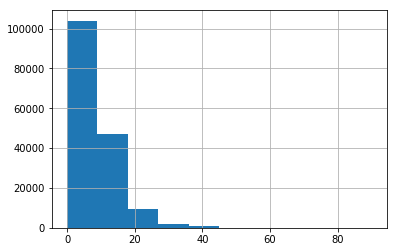

In [20]:
df=df.query('timelag<100')
df.timelag.hist()
df.timelag=df.timelag.fillna(np.mean(df.timelag))

In [21]:
df=df[df.msa.notnull()]

# Current Response Rate and Baseline rate 5.29

In [22]:
df.query('responded ==1').shape[0]*100/df.shape[0]

5.291547515310693

In [164]:
df.shape

(162958, 428)

In [163]:
df.describe()

,title,dob,age,numchld,income_range,wealth1,hit,mbcraft,mbgarden,mbbooks,...,minramnt,maxramnt,lastgift,timelag,avggift,id,responded,hphone_d,rfa_2f,cluster2
count,162958.000000,162958.000000,162958.000000,162958.000000,162958.000000,162958.000000,162958.000000,162958.000000,162958.000000,162958.000000,...,162958.000000,162958.000000,162958.000000,162958.000000,162958.000000,162958.000000,162958.000000,162958.000000,162958.000000,162958.000000
mean,59.204586,2719.077314,62.402680,0.196768,3.891764,5.333681,3.423299,0.070024,0.027265,0.509217,...,6.367474,19.835185,16.832536,8.065072,12.411685,91141.798991,0.052915,0.507493,2.015857,31.709115
std,997.244245,2097.440852,14.506471,0.589783,1.636951,2.006269,9.486921,0.328097,0.180987,1.259155,...,5.664781,26.175224,13.513141,6.249666,9.504129,52605.479856,0.223865,0.499945,1.085232,18.763896
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,1.285714,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,603.000000,53.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,12.000000,10.000000,4.000000,8.000000,45559.250000,0.000000,0.000000,1.000000,15.000000
50%,1.000000,2605.000000,63.000000,0.000000,4.000000,5.349063,0.000000,0.000000,0.000000,0.000000,...,5.000000,16.000000,15.000000,6.000000,10.818182,91150.500000,0.000000,1.000000,2.000000,32.000000
75%,2.000000,4501.000000,72.000000,0.000000,5.000000,6.000000,3.000000,0.000000,0.000000,0.000000,...,10.000000,22.000000,20.000000,11.000000,14.722222,136727.750000,0.000000,1.000000,3.000000,49.000000
max,72002.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,9.000000,...,450.000000,5000.000000,1000.000000,90.000000,948.500000,182189.000000,1.000000,1.000000,4.000000,62.000000


354 columns are numeric type reamng 74 variables are label encoded using SKlearn label encoder

# Label Encoding Categorical Variables

In [23]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

# Finding Categorical Variable

In [24]:
df.noexch=df.noexch.replace('X',0)
df.noexch=df.noexch.replace(' ',0)
df.noexch=df.noexch.astype('int')


In [26]:
for i in df.columns:
    if df[i].dtypes== 'O':
        print('variable',i,'encoded')
        df[i]=enc.fit_transform(df[i])

# Train Test Split

In [27]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
X=df.drop(['responded'],axis=1)
y=df.responded
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Random Forest Classifier 
Feature importance also shown below

In [29]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train,y_train);

In [184]:
for i in range(len(X.columns)):
    print(X.columns[i],rf.feature_importances_[i])

source 0.005778377036977156
title 0.0024129651866601934
state 0.0029964381862388977
zip 0.005780966503998659
mailcode 0.00031717165382417914
has_chapter 0.0003132026023231949
dob 0.004329769517765497
noexch 0.00021616207267380404
recinhse 0.0004725536042109928
recp3 0.0005533603832993481
recpgvg 0.00014273358775667295
recsweep 0.00022790997586946915
mdmaud 0.00011404368031341468
domain 0.002551265619425439
cluster 0.003446021706054217
age 0.004898782304677902
ageflag 0.001321413661496354
homeownr 0.0011423480558743608
child03 0.0003937056621684779
child07 0.0004486723724233088
child12 0.00039757744386247957
child18 0.0004767378237815562
numchld 0.0010503728205311382
income_range 0.0022619283161603807
gender 0.0015715764590344778
wealth1 0.002003573752762078
hit 0.002629812718924174
mbcraft 0.0010530311861907398
mbgarden 0.0004995079214670518
mbbooks 0.0016119348731991475
mbcolect 0.00046746061017585277
magfaml 0.0011520419894351965
magfem 0.0007998075977183111
magmale 0.000813976222302

afc5 0.003138568375967395
afc6 0.001844482638207551
vc1 0.0034296981681554823
vc2 0.0032970600231433216
vc3 0.0033540104158033203
vc4 0.002587680299819259
anc1 0.0021525819528379884
anc2 0.003296167191535383
anc3 0.0019160494296887843
anc4 0.0036542698841762573
anc5 0.0014181716888459425
anc6 0.0008321848412141151
anc7 0.003030182925708413
anc8 0.002222480069204915
anc9 0.002087058535430424
anc10 0.0018925900505753015
anc11 0.001094158445103525
anc12 0.0009796291173876542
anc13 0.001561471690424722
anc14 0.0016754699655632053
anc15 0.0009535739199060547
pobc1 0.002374579641670438
pobc2 0.004080918837795774
lsc1 0.002854973550452347
lsc2 0.002608643095146478
lsc3 0.001718727066522179
lsc4 0.002511469902466919
voc1 0.0020227490006322324
voc2 0.003097476454180523
voc3 0.0033786938631967726
hc1 0.00282394772927667
hc2 0.0031759532929935253
hc3 0.002218099653307637
hc4 0.002562280419065111
hc5 0.002795724623147135
hc6 0.002657693453371509
hc7 0.0026608883306419267
hc8 0.0028223988499416373


# prediction and Confusion Metrics

In [30]:
pred1=rf.predict(X_test)

In [31]:
metrics.accuracy_score(pred1,y_test)

0.9840451644575355

In [204]:
target_names=['No Response','Positve Response']
print(metrics.classification_report(y_test,pred1,target_names=target_names))


                  precision    recall  f1-score   support

     No Response       0.98      1.00      0.99     38596
Positve Response       1.00      0.70      0.82      2144

     avg / total       0.98      0.98      0.98     40740



# Recall
is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier recall  the  positive  in the sample.

The best value is 1 and the worst value is 0.

# precision 
is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.

In [199]:
metrics.precision_score(y_test,pred1)

0.9960079840319361

# Recall

In [203]:
sum(pred1)/sum(y_test)

0.7010261194029851

# Prediction After Principal Components Analysis


In [ ]:
columns=[]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Prediction on the unlabelled test data

In [73]:
test=pd.read_csv(r'C:\Users\maz\Desktop\uptake_data\test.csv')
test1=test

C:\Users\maz\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
X.shape

(162958, 427)

# Missing Values and Preprocessing unlabelled test data for prediction

In [60]:
c=0
for i in test.columns:
    if test[i].isnull().sum()>0:
        c+=1
        print(' Missing Data Percentage in Variable %s'%i,test[i].isnull().sum()*100/test.shape[0])
print('Total Number of Columns with missing data is ', c)

 Missing Data Percentage in Variable age 25.737824590676816
 Missing Data Percentage in Variable numchld 86.88080091771822
 Missing Data Percentage in Variable income_range 22.557096673271456
 Missing Data Percentage in Variable wealth1 47.17905933882574
 Missing Data Percentage in Variable mbcraft 55.678381478777766
 Missing Data Percentage in Variable mbgarden 55.678381478777766
 Missing Data Percentage in Variable mbbooks 55.678381478777766
 Missing Data Percentage in Variable mbcolect 55.78266764000417
 Missing Data Percentage in Variable magfaml 55.678381478777766
 Missing Data Percentage in Variable magfem 55.678381478777766
 Missing Data Percentage in Variable magmale 55.678381478777766
 Missing Data Percentage in Variable pubgardn 55.678381478777766
 Missing Data Percentage in Variable pubculin 55.678381478777766
 Missing Data Percentage in Variable pubhlth 55.678381478777766
 Missing Data Percentage in Variable pubdoity 55.678381478777766
 Missing Data Percentage in Variable p

# preprocessing Unlabelled data

1.removing date columns

In [61]:
date_columns=[]
for i in test.columns:
    if 'date' in i:
        date_columns.append(i)
test=test.drop(date_columns,axis=1)
test.shape

(9589, 428)

In [62]:
test['age']=test.age.fillna(np.nanmedian(test.age))

In [63]:
test=test.drop(['market'],axis=1)
test['numchld']=test.numchld.fillna(0)
test.income_range=test.income_range.fillna(np.nanmedian(test.income_range))
test.mbcraft=test.mbcraft.fillna(0)
for i in ['mbgarden',  'mbbooks', 'mbcolect', 'magfaml', 'magfem', 'magmale', 'pubgardn',
       'pubculin', 'pubhlth', 'pubdoity', 'pubnewfn', 'pubphoto', 'pubopp']:
    test[i]=test[i].fillna(0)
#test=test.drop(['amount'])
test=test.query('timelag<100')
test.timelag=test.timelag.fillna(np.mean(test.timelag))
test=test[test.msa.notnull()]
for i in test.columns:
    if 'ramnt' in i:
        test[i]=test[i].fillna(0)
test.wealth1=test.wealth1.fillna(np.nanmean(test.wealth1))
test.wealth2=test.wealth2.fillna(np.nanmean(test.wealth1))


In [64]:
test.isnull().sum()[test.isnull().sum()>0]

Series([], dtype: int64)

# Label encoding the test data

In [65]:
test.noexch=test.noexch.replace('X',0)
test.noexch=test.noexch.replace(' ',0)
test.noexch=test.noexch.astype('int')
for i in test.columns:
    if test[i].dtypes== 'O':
        print('variable ',i,'is label encoded')
        test[i]=enc.fit_transform(test[i])

variable  source is label encoded
variable  state is label encoded
variable  zip is label encoded
variable  mailcode is label encoded
variable  has_chapter is label encoded
variable  recinhse is label encoded
variable  recp3 is label encoded
variable  recpgvg is label encoded
variable  recsweep is label encoded
variable  mdmaud is label encoded
variable  domain is label encoded
variable  cluster is label encoded
variable  ageflag is label encoded
variable  homeownr is label encoded
variable  child03 is label encoded
variable  child07 is label encoded
variable  child12 is label encoded
variable  child18 is label encoded
variable  gender is label encoded
variable  datasrce is label encoded
variable  solp3 is label encoded
variable  solih is label encoded
variable  major is label encoded
variable  geocode is label encoded
variable  collect1 is label encoded
variable  veterans is label encoded
variable  bible is label encoded
variable  catlg is label encoded
variable  homee is label encode

In [66]:
test['predictions']=rf.predict(test)


In [72]:
test_results=test[['predictions']]


C:\Users\maz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
9557    0.0
9558    1.0
9559    0.0
9560    0.0
9561    0.0
9562    0.0
9563    0.0
9564    0.0
9565    0.0
9566    0.0
9567    0.0
9568    0.0
9569    0.0
9570    0.0
9571    0.0
9572    0.0
9573    0.0
9574    0.0
9575    0.0
9576    1.0
9577    0.0
9578    0.0
9579    0.0
9580    0.0
9581    0.0
9582    0.0
9583    0.0
9584    0.0
9585    0.0
9587    1.0
Name: predictions, Length: 26667, dtype: float64

In [85]:
test2=pd.concat([test1,test_results],axis=1)
test2.predictions=test2.predictions.fillna(0)
test2.market=test2.predictions
test2=test2.drop(['predictions'],axis=1)

In [88]:
import os
os.getcwd()

'C:\\Users\\maz'

In [86]:
test2.to_csv('test.csv')

# profitability 
profitability in  test data predictions = total amount of donations received in test data -total amount of expenditure 

# Actual Donations Received in Test Set

In [310]:
#true positives
tp=(y_test+pred1)==2
donation_receieved=df.iloc[y_test[tp].index].amount.sum()
print('donation_receieved',donation_receieved)

38661.689

# Expense Incurred 
If we would have marketed as per the predictions of random forest model the Expense incurred would be

In [414]:
a=df.iloc[y_test[pred1==1].index]
expense=a.merge(zipcost).marketingCost.sum()
print('expense=',expense)

expense= 10767.2


# profitability is 259% percnetage based on random forest

In [415]:
profitability=(donation_receieved-expense)*100/expense
print('profitability',profitability,'percentage')

profitability 259.0691080318003 percentage


# Classifiaction using  SVM

In [89]:
# Create a simple classifier
from sklearn import svm
classifier = svm.LinearSVC(random_state=42)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [94]:
pred1=classifier.predict(X_test)
sum(pred1)

0

In [95]:
#true positives
tp=(y_test+pred1)==2
donation_receieved=df.iloc[y_test[tp].index].amount.sum()
print('donation_receieved',donation_receieved)
a=df.iloc[y_test[pred1==1].index]
expense=a.merge(zipcost).marketingCost.sum()
print('expense=',expense)
profitability=(donation_receieved-expense)*100/expense
print('profitability',profitability,'percentage')

donation_receieved 0.0
expense= 0.0
profitability nan percentage


C:\Users\maz\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


# Profitability
Profitability of campaign = sum of all amounts received – sum of all marketing costs for customers to whom you marketed. 


In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# 3.Random Forest Hyperparametes tuning using Randomized search

In [ ]:
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# build a classifier
clf = RandomForestClassifier(X_train,y_train,n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [20, None],
              "max_features": sp_randint(10, 21),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)
start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# 4.Using Naive Bayes Classifier

In [98]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)


In [101]:
pred1=y_pred
tp=(y_test+pred1)==2
donation_receieved=df.iloc[y_test[tp].index].amount.sum()
print('donation_receieved',donation_receieved)
a=df.iloc[y_test[pred1==1].index]


donation_receieved 19777.8


In [ ]:
expense=a.merge(zipcost).marketingCost.sum()
print('expense=',expense)
profitability=(donation_receieved-expense)*100/expense
print('profitability',profitability,'percentage')